## Predicting user who is going to click Ads

#### import the Library and Data Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Read the files
df = pd.read_csv('B:\\advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### to know what variable each colunm contains

In [4]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

### to know any missing value is avaiable in the data

In [5]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
df.columns[df.isnull().any()].tolist()

[]

#### to how many field or row avaiable in dataset

In [7]:
len(df)

1000

In [10]:
df.columns

Index([u'Daily Time Spent on Site', u'Age', u'Area Income',
       u'Daily Internet Usage', u'Ad Topic Line', u'City', u'Male', u'Country',
       u'Timestamp', u'Clicked on Ad'],
      dtype='object')

### Identify numerical and categorical variables

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null object
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


### Summarizing the numerical and categorical variab

In [142]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


### here i am going to start EDA part using 

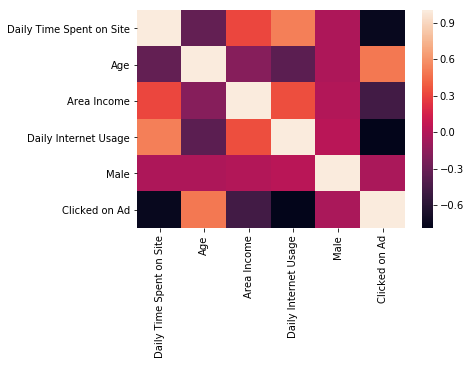

In [13]:
#Heatmaps help you visualize matrix-like data.

# Calculate correlations
corr = df.corr()
corr
# Heatmap
sns.heatmap(corr)

In [14]:
corr

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


In [20]:
df["Male"].value_counts()

0    519
1    481
Name: Male, dtype: int64

In [23]:
df2=df
df2.head()
#df["sex"]=p.series

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [48]:
df2["Clicked on Ad"] = df["Clicked on Ad"].astype(str)


dtype('O')

In [49]:
df2["Clicked on Ad"].replace('0','No',inplace=True)

In [50]:
df2["Clicked on Ad"].replace('1','yes',inplace=True)

In [51]:
df2["Clicked on Ad"].value_counts()

yes    500
No     500
Name: Clicked on Ad, dtype: int64

In [52]:
df2["Clicked on Ad"].replace('No','Not click',inplace=True)

In [53]:
df2["Clicked on Ad"].replace('yes','click',inplace=True)

In [54]:
df2["Clicked on Ad"].value_counts()

Not click    500
click        500
Name: Clicked on Ad, dtype: int64

In [55]:
df2["Male"] = df["Male"].astype(str)
df2["Male"].replace('0','Female',inplace=True)
df2["Male"].replace('1','Male',inplace=True)

In [56]:
df2["Male"].value_counts()

Female    519
Male      481
Name: Male, dtype: int64

In [57]:
df2.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,Not click
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,Not click
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,Not click
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,Not click
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,Not click


In [58]:
df[(df["Ad Topic Line"]=="Robust logistical utilization") & (df["Daily Internet Usage"]>50)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,Not click


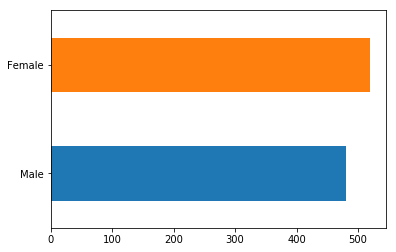

In [72]:
df['Male'].value_counts(sort=False).plot.barh()


### you can use .size() to get aggregated value of the particular column only or .count() for every column. Since we only need for Month so I used that. Plot the graph and you find this:

Text(0,0.5,'Total time of country visited')

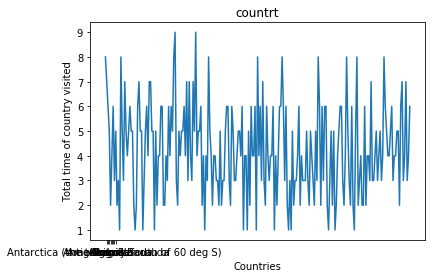

In [91]:
plot_by_month = Sites_country.plot(title='countrt',xticks=(1,2,3,4,5,6,7,8))
plot_by_month.set_xlabel('Countries')
plot_by_month.set_ylabel('Total time of country visited')

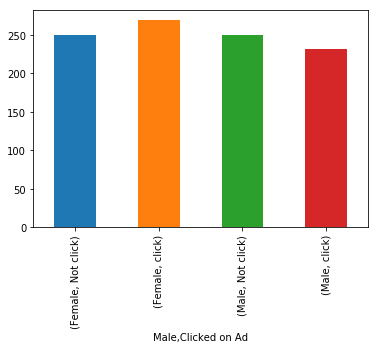

In [125]:
(df
 .groupby(['Male','Clicked on Ad'])
 .size()
 .plot.bar(stacked=True)
)

In [131]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,Not click
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,Not click
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,Not click
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,Not click
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,Not click


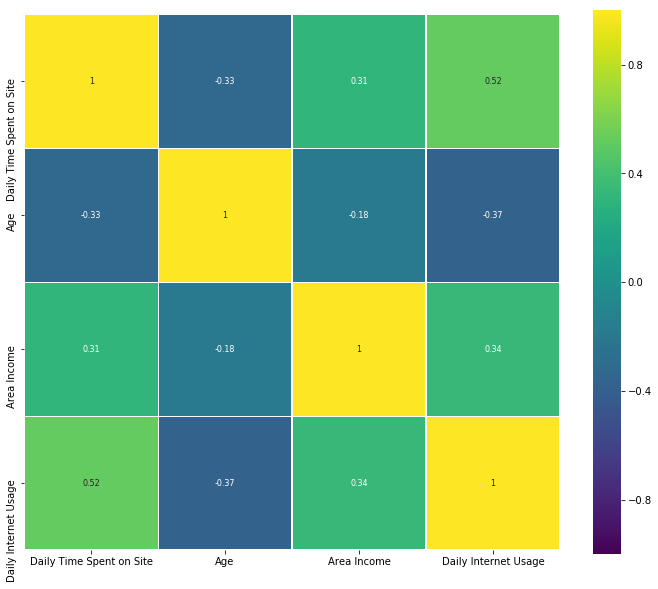

In [140]:
#corr = df.drop('Clicked on Ad', axis=1).corr() # We already correlations
corr=df.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [157]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
df.columns

Index([u'Daily Time Spent on Site', u'Age', u'Area Income',
       u'Daily Internet Usage', u'Ad Topic Line', u'City', u'Male', u'Country',
       u'Timestamp', u'Clicked on Ad'],
      dtype='object')

In [159]:
df = df.rename(index=str, columns={"Daily Time Spent on Site": "Daily_Time_Spent_on_Site", 
                                   "Area Income": "Area_Income", 
                                   "Daily Internet Usage": "Daily Internet Usage"
                                        ,"Daily Internet Usage":"Daily_Internet_Usage",
                                   "Ad Topic Line": "Ad_Topic_Line",
                                   "Clicked on Ad": "Clicked_on_Ad",})

In [161]:
df.columns

Index([u'Daily_Time_Spent_on_Site', u'Age', u'Area_Income',
       u'Daily_Internet_Usage', u'Ad_Topic_Line', u'City', u'Male', u'Country',
       u'Timestamp', u'Clicked_on_Ad'],
      dtype='object')

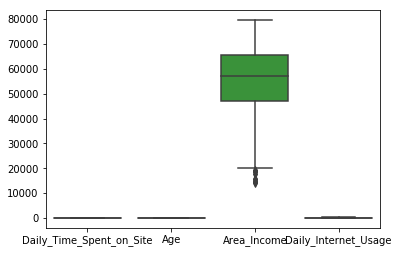

In [168]:
sns.boxplot(data=df)

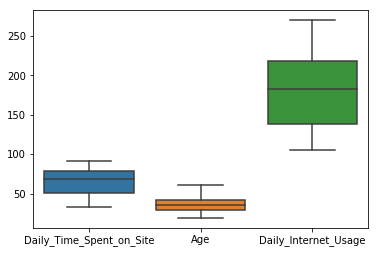

In [169]:
# Pre-format DataFrame
stats_df = df.drop(['Area_Income'], axis=1)
sns.boxplot(data=stats_df)

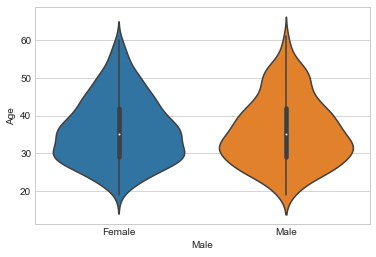

In [172]:
sns.set_style('whitegrid')

# Violin plot
sns.violinplot(y='Age', x='Male', data=df)

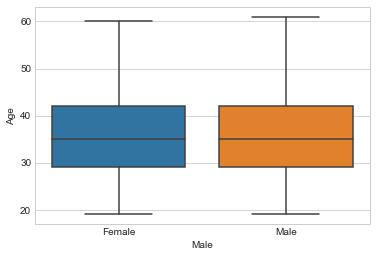

In [178]:
sns.boxplot(y='Age', x='Male', data=df)

C:\Users\admin\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


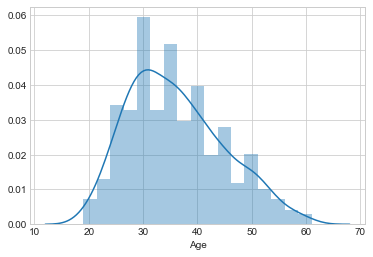

In [180]:

#Histogram#Histogr 
#Histograms allow you to plot the distributions of numeric variables.

sns.distplot(df.Age)

C:\Users\admin\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


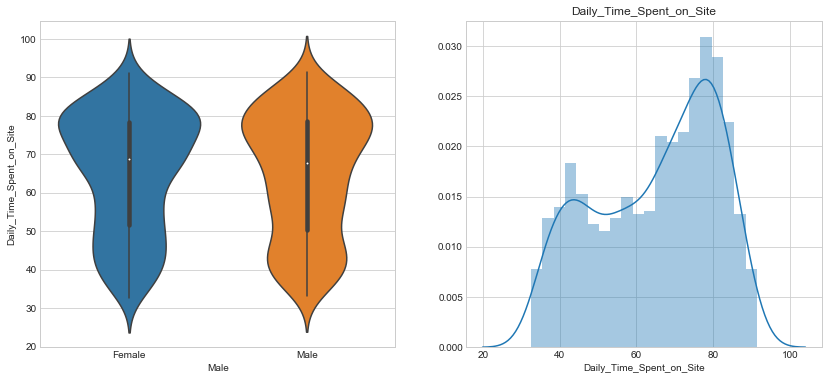

C:\Users\admin\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


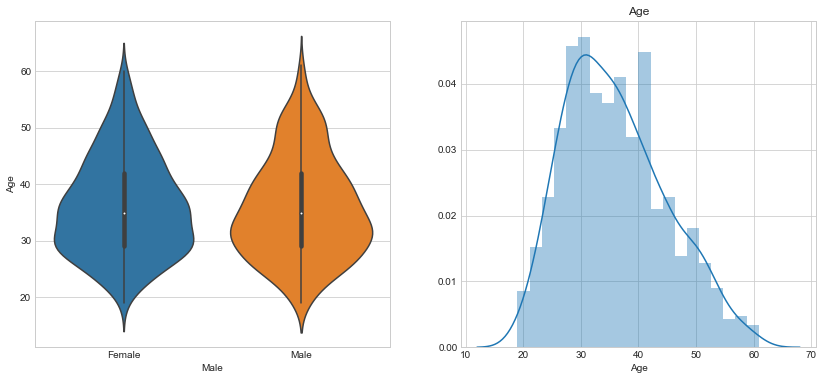

C:\Users\admin\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


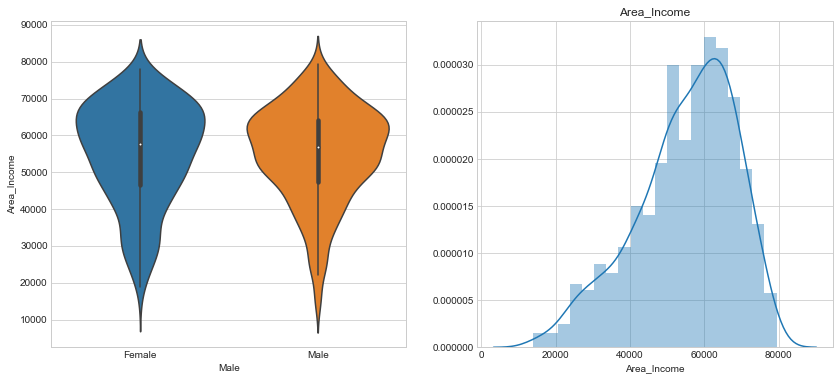

C:\Users\admin\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


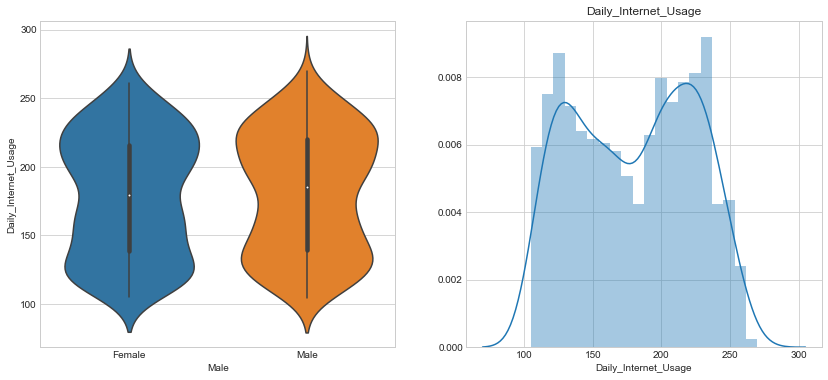

In [199]:
visual_dat= ['Daily_Time_Spent_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage']


for i in visual_dat:
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.violinplot(x=df.Male,y=df[i])
    plt.subplot(1,2,2)
    sns.distplot(df[i],bins= 20)    
    plt.title(i)    
    plt.show()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

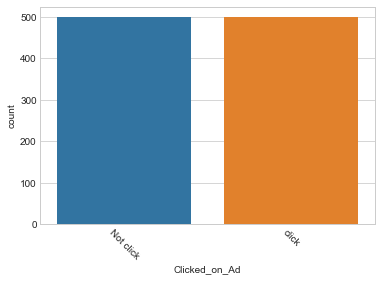

In [195]:
#Bar plots help you visualize the distributions of categorical variables.

sns.countplot(x='Clicked_on_Ad',data=df)
 
# Rotate x-labels
plt.xticks(rotation=-45)